In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.api import  Holt
# double exponaontial Methods data 
df = pd.read_excel(r"C:\Users\PC-KARIM\Desktop\timeserises.xlsx")
df.head()

,date,Infections
0,2020-03-02,1
1,2020-03-03,0
2,2020-03-04,0
3,2020-03-05,0
4,2020-03-06,1


In [55]:
df.tail()

,date,Infections
44,2020-04-15,136
45,2020-04-16,259
46,2020-04-17,281
47,2020-04-18,121
48,2020-04-19,170


Text(0.5, 1.0, 'propagation de covid19 au maroc ')

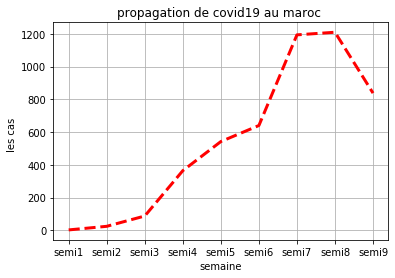

In [6]:
import pandas as pd
ser = pd.Series([2,24,87,364,542,640,1194,1210,838], index=['semi1','semi2','semi3',
                                    'semi4','semi5','semi6','semi7','semi8','semi9'])
plt.plot(ser,color = 'red',linewidth = 3,linestyle='--')
plt.grid()
plt.xlabel('semaine')
plt.ylabel('les cas  ')
plt.title('propagation de covid19 au maroc ')


In [ ]:

'''
Double Exponential Smoothing - Holt Method for Confirmed cases in Morocco
'''
""" 
ft+1=at+bt
at=αyt + (1−α)(at−1+bt−1) level 
bt=β(at−at−1) + (1−β)bt−1 trend
"""


In [104]:
def double_exponential_smoothing(ser, alpha=0.2, beta=0.3, n_preds=1):
    """
    Given a series, alpha, beta and n_preds (number of
    forecast/prediction steps), perform the prediction.
    """
    n_record = ser.shape[0]
    results = np.zeros(n_record + n_preds)

    # first value remains the same as series,
    # as there is no history to learn from;
    # and the initial trend is the slope/difference
    # between the first two value of the series
    level = ser[0]
    results[0] = ser[0]
    trend = ser[1] - ser[0]
    for t in range(1, n_record + 1):
        if t >= n_record:
            # forecasting new points
            value = results[t - 1]
        else:
            value = ser[t]

        previous_level = level
        level = alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - previous_level) + (1 - beta) * trend 
        results[t] = level + trend

    # for forecasting beyond the first new point,
    # the level and trend is all fixed
    if n_preds > 1:
        results[n_record + 1:] = level + np.arange(2, n_preds + 1) * trend

    return results

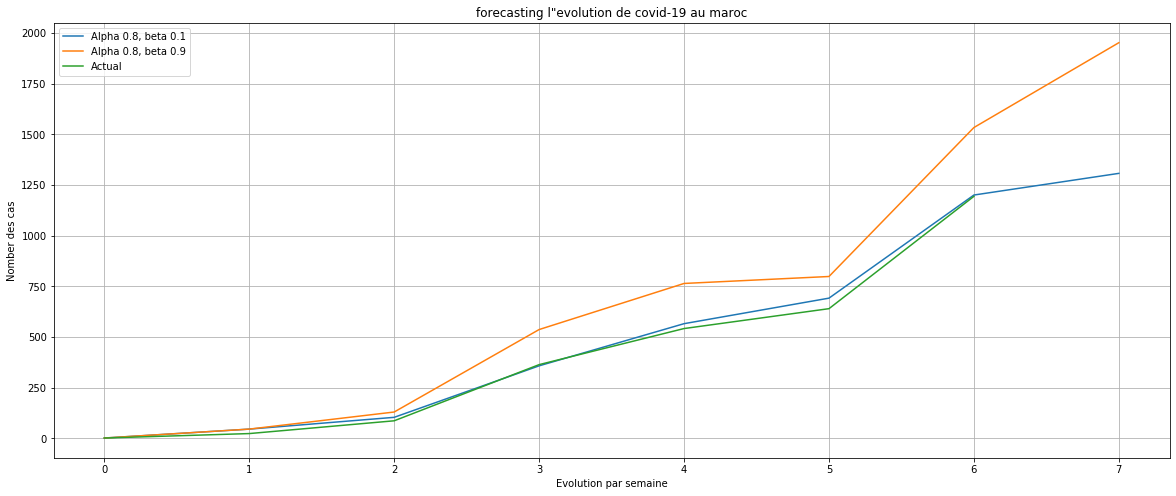

In [105]:
def plot_double_exponential_smoothing(ser, alphas, betas):
    """Plots double exponential smoothing with different alphas and betas."""    
    plt.figure(figsize=(20, 8))
    for alpha, beta in zip(alphas, betas):
        results = double_exponential_smoothing(ser, alpha, beta)
        plt.plot(results, label='Alpha {}, beta {}'.format(alpha, beta))

    plt.plot(ser, label='Actual')
    plt.legend(loc='best')
    plt.axis('tight')
    plt.xlabel('Evolution par semaine')
    plt.ylabel('Nomber des cas')
    plt.title('forecasting l"evolution de covid-19 au maroc')
    plt.grid(True)

plot_double_exponential_smoothing(ser.values, alphas=[0.8, 0.8], betas=[0.1, 0.9])



In [52]:
"""  Machine Learning  -  Linear Regression  """
     MinΣe²=Σ(Yt−a−bt)²


'  Machine Learning  -  Linear Regression  '

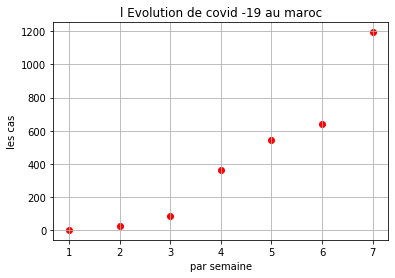

In [42]:
# plot scatter for propagtion of covid 19 in Morocco
data = [2,24,87,364,542,640,1194]
index=[1,2,3,4,5,6,7]
plt.scatter(index, data,color='r')
plt.grid()
plt.xlabel('par semaine')
plt.title('l Evolution de covid -19 au maroc')
plt.ylabel('les cas')
plt.show()

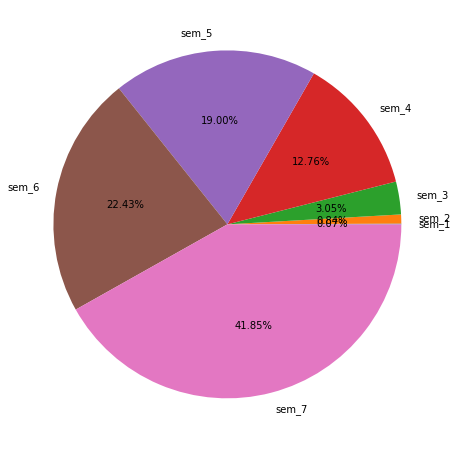

In [73]:
data = [2,24,87,364,542,640,1194]
index=["sem_1","sem_2","sem_3","sem_4","sem_5","sem_6","sem_7"] 
plt.figure(figsize=(8,8))
explode = (0, 0, 0, 0,0,0,0,0.1)
plt.pie(data,labels=index,autopct='%0.2f%%',shadow =False)

plt.show()


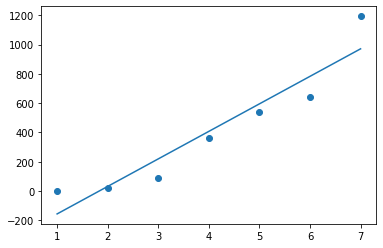

In [108]:
from scipy import stats
data = [2,24,87,364,542,640,1194]
index=[1,2,3,4,5,6,7]

slope, intercept, r, p, std_err = stats.linregress(index, data)

def myfunc(index):
    return slope * index + intercept

mymodel = list(map(myfunc, index))

plt.scatter(index, data)
plt.plot(index, mymodel)
plt.show()

In [45]:
print(r)
    #The result 0.94 shows that there is a relationship, 
    #not perfect, but it indicates that we could use linear regression 
    #in future predictions.  -1<r<1
    # r**2 mesuare the relation ex ist betten 2 variables if r**2 = 0 that mean no relationship if 1 or -1 
    # means 100% related.

0.9453904323930775


In [109]:
print(slope,intercept)

187.9642857142857 -344.2857142857142


In [110]:
 """Predict Future Value"""
    # Let us try to predict the Number of cases for next week (8)
week_8 = myfunc(8)
print(week_8)


1159.4285714285713


Text(0.5, 1.0, 'Guéri par semaine')

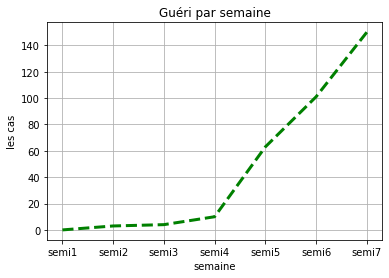

In [81]:

Recov = pd.Series([0,3,4,10,63,101,150], index=['semi1','semi2','semi3','semi4','semi5','semi6','semi7'])
plt.plot(Recov,color = 'green',linewidth = 3,linestyle='--')
plt.grid()
plt.xlabel('semaine')
plt.ylabel('les cas')
plt.title("Guéri par semaine")

Text(0.5, 0.98, 'GERIS')

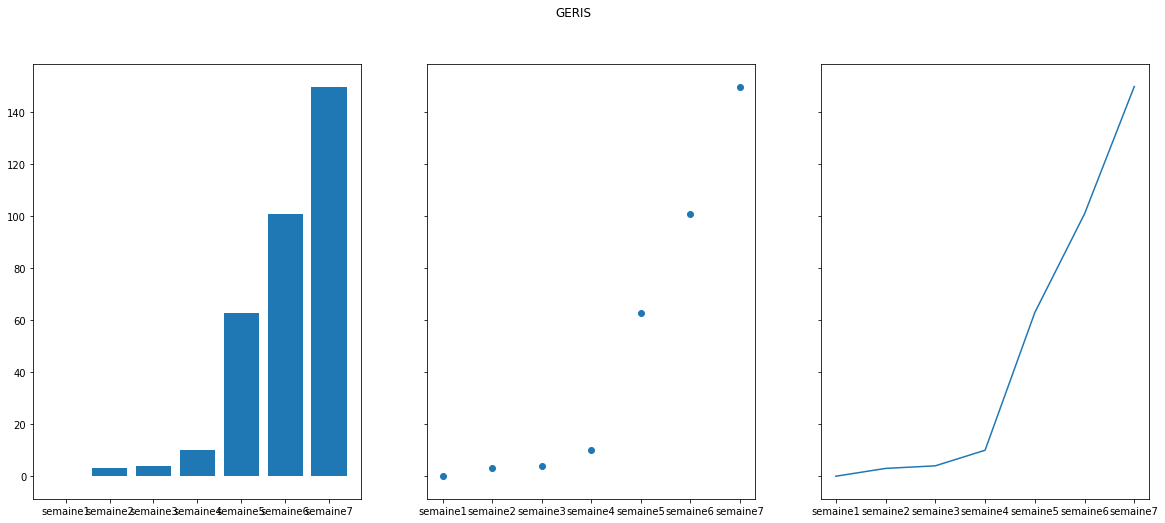

In [103]:

data = {'semaine1': 0, 'semaine2': 3, 'semaine3': 4, 
        'semaine4': 10,'semaine5': 63, 'semaine6': 101,'semaine7':150}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('GERIS')


In [95]:
'''Double Exponential Smoothing - Holt Method for Recovered cases in Morocco '''

def double_exponential_smoothing(Recov, alpha=0.2, beta=0.3, n_preds=2):
    """
    Given a series, alpha, beta and n_preds (number of
    forecast/prediction steps), perform the prediction.
    """
    n_record = Recov.shape[0]
    results = np.zeros(n_record + n_preds)

    # first value remains the same as series,
    # as there is no history to learn from;
    # and the initial trend is the slope/difference
    # between the first two value of the series
    level =Recov[0]
    results[0] = Recov[0]
    trend = Recov[1] - Recov[0]
    for t in range(1, n_record + 1):
        if t >= n_record:
            # forecasting new points
            value = results[t - 1]
        else:
            value = Recov[t]

        previous_level = level
        level = alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - previous_level) + (1 - beta) * trend 
        results[t] = level + trend

    # for forecasting beyond the first new point,
    # the level and trend is all fixed
    if n_preds > 1:
        results[n_record + 1:] = level + np.arange(2, n_preds + 1) * trend

    return results

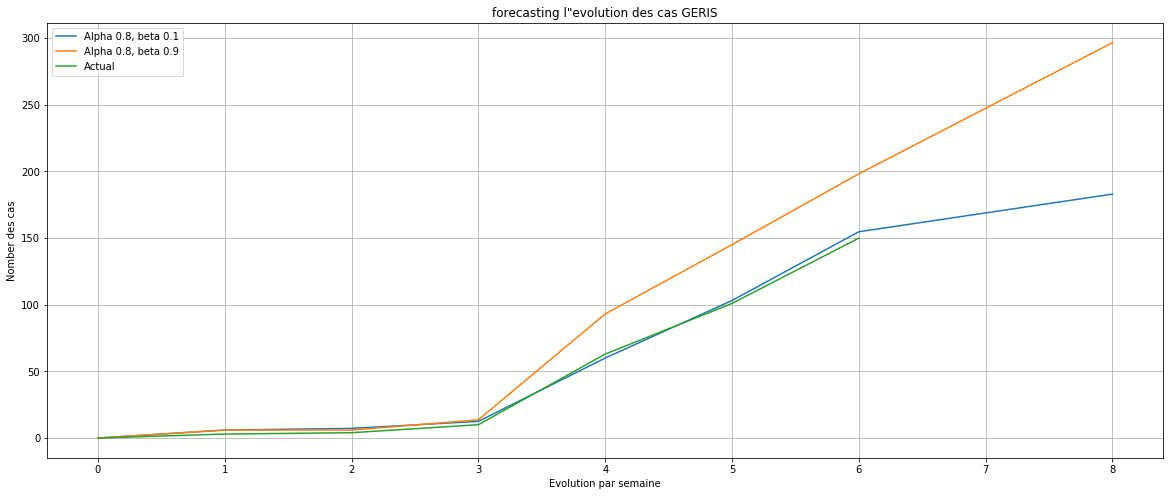

In [96]:
def plot_double_exponential_smoothing(Recov, alphas, betas):
    """Plots double exponential smoothing with different alphas and betas."""    
    plt.figure(figsize=(20, 8))
    for alpha, beta in zip(alphas, betas):
        results = double_exponential_smoothing(Recov, alpha, beta)
        plt.plot(results, label='Alpha {}, beta {}'.format(alpha, beta))

    plt.plot(Recov, label='Actual')
    plt.legend(loc='best')
    plt.axis('tight')
    plt.xlabel('Evolution par semaine')
    plt.ylabel('Nomber des cas')
    plt.title('forecasting l"evolution des cas GERIS')
    plt.grid(True)

plot_double_exponential_smoothing(Recov.values, alphas=[0.8, 0.8], betas=[0.1, 0.9])


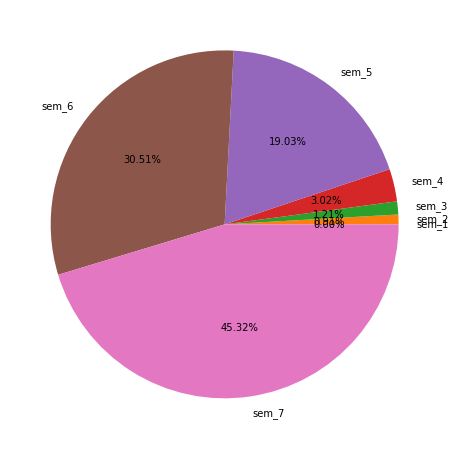

In [92]:
recov = [0,3,4,10,63,101,150]
index=["sem_1","sem_2","sem_3","sem_4","sem_5","sem_6","sem_7"] 
plt.figure(figsize=(8,8))
explode = (0, 0, 0, 0,0,0,0,0.1)
plt.pie(recov,labels=index,autopct='%0.2f%%',shadow =False)


plt.show()

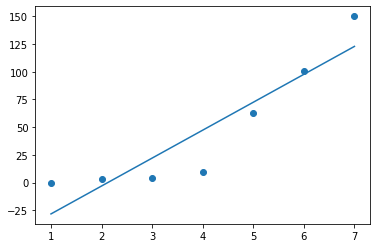

In [99]:
from scipy import stats
data = [0,3,4,10,63,101,150]
index=[1,2,3,4,5,6,7]

slope, intercept, r, p, std_err = stats.linregress(index, data)

def myfunc(index):
  return slope * index + intercept

mymodel = list(map(myfunc, index))

plt.scatter(index, data)
plt.plot(index, mymodel)
plt.show()

In [100]:
print(r)

0.9162677372411508


In [101]:
 """Predict Future Value"""
    # Let us try to predict the Number of cases for next week (8)
week_8 = myfunc(8)
print(week_8)


148.0
